# Wie können Marienkäfer von Raupen unterschieden werden?

## Vorbereitung

<div class="alert alert-block alert-success">

Uns liegt also ein Datensatz für 200 Marienkäfer und Raupen vor. Diese Daten benutzen wir, um das System zu **trainieren**, damit es später unbekannte Insekten als Käfer bzw. Raupe erkennen kann.

<div class="alert alert-block alert-info">

Zur Vorbereitung werden wieder einige notwendige Bibliotheken sowie die Daten eingelesen.
    
**Führe also die folgenden beiden Zellen aus:**

In [3]:
import pandas as pd
import plotly.express as px
from PyTree import ClassificationTree as ct
import ipywidgets as widgets

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

data_x = "Breite"
data_y = "Länge"
target = "Insekt"
breite=800
hoehe=600

In [4]:
df_kaefer = pd.read_csv("Daten/Kaefer_mm.csv", sep=";")
display(df_kaefer)

,Breite,Länge,Insekt
0,12.19,9.65,Marienkäfer
1,8.13,18.80,Raupe
2,12.45,6.86,Marienkäfer
3,14.73,11.68,Marienkäfer
4,2.79,14.73,Raupe
...,...,...,...
195,14.48,9.40,Marienkäfer
196,2.54,13.72,Raupe
197,9.91,20.57,Raupe
198,14.22,7.37,Marienkäfer


In [5]:
max_x = max(df_kaefer ["Breite"])
min_x = min(df_kaefer ["Breite"])
max_y = max(df_kaefer ["Länge"])
min_y = min(df_kaefer ["Länge"])

delta_x = (max_x - min_x)
delta_y = (max_y - min_y)

bereich_x = [int(min_x - delta_x*0.05), int(max_x + delta_x*0.05)]
bereich_y = [int(min_y - delta_y*0.05), int(max_y + delta_y*0.05)]

## Entscheidungsbaum

<div class="alert alert-block alert-success">

Die Idee vom **Schwellenwert** kann man auch anders darstellen. 
    
Betrachten wir nochmal das Streudiagramm mit dem Schwellenwert `Länge 12`, in dem die Anzahl Fehlklassifikationen eingetragen ist: 

In [9]:
schwellenwert = 12

def fehlersumme_l(threshold):
    tree = ct.DecisionTree(target=target, data=df_kaefer)
    tree.manual_split(attribute="Länge", threshold=threshold, node_nr=1)
    return tree.calculate_errors(data=df_kaefer)


fig = px.scatter(
    df_kaefer,
    x=data_x,
    y=data_y,
    color=target,
    color_discrete_map=color_map,
    width=breite,
    height=hoehe,
    range_x=bereich_x,
    range_y=bereich_y,
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color="black")))

fig.update_layout(
    shapes=[
        dict(
            type="line",
            yref="y1",
            y0=schwellenwert,
            y1=schwellenwert,
            xref="x1",
            x0=bereich_x[0],
            x1=bereich_x[1],
            line=dict(color="Red", width=1),
        )
    ]
)

fig.add_annotation(
    x=10,
    y=schwellenwert,
    text="Schwellenwert der Länge=" + str(schwellenwert),
    showarrow=True,
    xshift=20,
)

fig.add_annotation(
    x=10,
    y=schwellenwert,
    text="Fehler: " + str(fehlersumme_l(schwellenwert)),
    showarrow=False,
    yshift=50,
)


fig.show()

<div class="alert alert-block alert-success">

Die Anzahl der Fehler ist hier 19. 
    
Schau dir den zugehörigen Entscheidungsbaum an und erläutere, wie der Wert 19 zustande kommt.

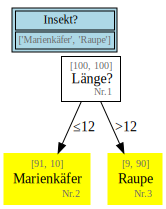

In [10]:
tree = ct.DecisionTree(target=target, data=df_kaefer)
tree.manual_split(attribute="Länge", threshold=12, node_nr=1)
tree.print_tree()

<div class="alert alert-block alert-success">

Eine solche Darstellung nennen wir **Entschidungsbaum** (engl.: **Decision Tree**). 
    
In dem blau-unterlegten Rechteck (das gehört eigentlich nicht zu dem Baum) findet man Angaben, die für das Verständnis der Darstellung wichtig sind.

<div class="alert alert-block alert-warning">

#### *Aufgabe:*

Beschreibe, welche Informationen hier erkennbar sind.

<div class="alert alert-block alert-info">
    
Schreibe jetzt hier Deine Beobachtung hin.
    
- In dem blauen Rechteck:
    - ???
- In dem weissen Rechteck Nr. 1:
   - ??? 
- In dem linken gelben Rechteck Nr. 2:
   - ??? 
- In dem rechten gelben Rechteck Nr. 3:
    - ???
</div>

<div class="alert alert-block alert-success">

- Die rechteckigen Kästen (weiss bzw gelb unterlegt) sind sog. **Knoten** des Baumes. Diese Knoten enthalten wichtige Informationen.
    - Es gibt in dem dargestellten Entscheidungsbaum drei Knoten; zur Unterscheidung haben sie Nummern 1, 2 und 3.
    - Der oberste (in der Graphik weiß dargestellte) Knoten heißt **Wurzelknoten**.
    - Die beiden gelb-unterlegten Knoten nennt man **Blätter**.


<div class="alert alert-block alert-success">

Du kannst dir hier für verschiedene Schwellenwerte den jeweiligen Entscheidungsbaum ansehen:

In [ ]:
start = (min_y + max_y) // 2

slider_l = widgets.BoundedFloatText(
    value=start,
    min=int(min_y+1),
    max=int(max_y-1),
    step=1,
    description="",
    layout=widgets.Layout(width="30%"),
)

def makeTree_l(schwellenwert):
    tree = ct.DecisionTree(target=target, data=df_kaefer)
    tree.manual_split(attribute="Länge", threshold=schwellenwert, node_nr=1)
    return tree

def on_value_change_l(event):

    with output_l:
        output_l.clear_output()
        sw_l = event["new"]
        tree = makeTree_l(sw_l)
        display (tree.print_tree())


slider_l.observe(on_value_change_l, names="value")

output_l = widgets.Output ();
display(
    widgets.HBox([widgets.Label("Schwellenwert für die Länge"), slider_l, output_l])
)
sw_l = start
tree = makeTree_l(sw_l)
with output_l:
    display (tree.print_tree())

<div class="alert alert-block alert-warning">

#### *Aufgabe:* 
    
Bestätige anhand dieser dynamischen Graphik, dass der Schwellenwert für die Länge zwischen 50 und 55 liegen sollte, damit die Anzahl der Fehler minimal wird.

<div class="alert alert-block alert-warning">

#### *Aufgabe:* 
    
Finde anhand dieser dynamischen Graphik heraus, wie viele Fehlklassifikationen für den Schwellenwert 

1. `Länge = 30`
2. `Länge = 70`
    
    
entstehen.

1. Für einen Schwellenwert von 30 werden 9 Insekten (1 Marienkäfer, 8 Raupen) falsch klassifiziert. 
2. Für einen Schwellenwert von 70 werden 6 Insekten (alles Marienkäfer) falsch als Raupe klassifiziert. 

<div class="alert alert-block alert-success">

Statt der Länge können wir jetzt - wie in dem vorigen Notebook - auch die Breite als Kriterium nutzen:

In [ ]:
start = (min_x + max_x) // 2

slider_r = widgets.BoundedFloatText(
    value=start,
    min=int(min_x+1),
    max=int(max_x-1),
    step=1,
    description="",
    layout=widgets.Layout(width="30%"),
)

def makeTree_r(schwellenwert):
    tree = ct.DecisionTree(target=target, data=df_kaefer)
    tree.manual_split(attribute="Breite", threshold=schwellenwert, node_nr=1)
    return tree

def on_value_change_r(event):

    with output_r:
        output_r.clear_output()
        sw_r = event["new"]
        tree = makeTree_r(sw_r)
        display (tree.print_tree())


slider_r.observe(on_value_change_r, names="value")

output_r = widgets.Output()

display(
    widgets.HBox([widgets.Label("Schwellenwert für die Breite"), slider_r, output_r])
)
sw_r = start
tree = makeTree_r(sw_r)
with output_r:
    display (tree.print_tree())

<div class="alert alert-block alert-warning">

#### *Aufgabe:* 
    
Finde anhand dieser dynamischen Graphik heraus, wie viele Fehlklassifikationen für den Schwellenwert 

1. `Breite = 30`
2. `Breite = 40`
    
    
entstehen.

1. Für einen Schwellenwert von 30 werden 3 Insekten falsch klassifiziert, eine Raupe sowie 2 Marienkäfer.
2. Für einen Schwellenwert von 40 werden 2 Marienkäfer falsch als Raupe klassifiziert. 

<div class="alert alert-block alert-warning">

#### *Aufgabe:* 
    
Bestätige anhand dieser dynamischen Graphik, dass der optimale Schwellenwert für die Breite tatsächlich 27, 28 bzw. 29 ist. 

<div class="alert alert-block alert-success">

Hier kannst du dir nochmal verschiedene Entscheidungsbäume ansehen. Du kannst
    
- wählen, ob du die Länge oder die Breite der Insekten als Prädiktorvariable nutzen möchtest
- den Schwellenwert einstellen.

In [ ]:
def show_tree(attribute, schwellenwert):

    tree = ct.DecisionTree(target=target, data=df_kaefer)
    tree.manual_split(attribute=attribute, threshold=schwellenwert, node_nr=1)
    tree.print_tree()
    display(tree.tree_graph)

    return tree


tree_widget = widgets.interactive(
    show_tree,
    {"manual": True, "manual_name": "Erstelle Tree"},
    attribute = ["Länge","Breite"],
    schwellenwert = (0, 25, 1)
)
tree_widget

## Weitere manuelle Datensplits

<div class="alert alert-block alert-success">

### Fazit bisher:
    
Wenn wir nur eine der beiden Variablen für einen Datensplit benutzen, ist die Wahl der Breite mit einem Schwellenwert von z.B. 28 offenbar optimal, obwohl dann immer noch ein Fehler entsteht!
    
Also definieren wir ab hier:

In [ ]:
# Das ist der optimale Schwellenwert, wenn wir als Prädiktorvariable die Breite der Insekten wählen:
besterSchwellenwert = 28 

<div class="alert alert-block alert-success">

### Streudiagramm mit bestem Schwellenwert:
    
Wenn wir nur eine der beiden Variablen für einen Datensplit benutzen, ist die Wahl der Länge mit einem Schwellenwert von 0.51 offenbar optimal, obwohl dann immer noch 14 Fehler entstehen!
    
Hier nochmals das zugehörige Streudiagramm mit der horizontalen Trennlinie:

In [ ]:
schwellenwert = besterSchwellenwert

def fehlersumme_r(threshold):
    tree = ct.DecisionTree(target=target, data=df_kaefer)
    tree.manual_split(attribute="Breite", threshold=threshold, node_nr=1)
    return tree.calculate_errors(data=df_kaefer)


def makeFigure_r(schwellenwert):
    fig = px.scatter(
        df_kaefer,
        x=data_x,
        y=data_y,
        color=target,
        color_discrete_map=color_map,
        width=breite,
        height=hoehe,
        range_x=bereich_x,
        range_y=bereich_y,
    )

    fig.update_traces(marker=dict(size=10, line=dict(width=1, color="black")))

    fig.update_layout(
        shapes=[
            dict(
                type="line",
                yref="y1",
                x0=schwellenwert,
                x1=schwellenwert,
                xref="x1",
                y0=bereich_y[0],
                y1=bereich_y[1],
                line=dict(color="Red", width=1),
            ),
            dict(
                type="rect",
                yref="y1",
                x0=schwellenwert,
                x1=bereich_x[1],
                xref="x1",
                y0=bereich_y[0],
                y1=bereich_y[1],
                fillcolor=color_map["Marienkäfer"],
                opacity=0.3,
                layer="below",
                line_width=0,
            ),
            dict(
                type="rect",
                yref="y1",
                x0=bereich_x[0],
                x1=schwellenwert,
                xref="x1",
                y0=bereich_y[0],
                y1=bereich_y[1],
                fillcolor=color_map["Raupe"],
                opacity=0.3,
                layer="below",
                line_width=0,
            ),
        ]
    )

    fig.add_annotation(
        y=80,
        x=schwellenwert,
        text="Schwellenwert der Breite=" + str(int(schwellenwert)),
        showarrow=False,
        # xshift=20,
    )

    fig.add_annotation(
        y=75,
        x=schwellenwert,
        text="Fehler: " + str(fehlersumme_r(schwellenwert)),
        showarrow=False,
        #yshift=-20,
    )
    return fig


makeFigure_r (besterSchwellenwert).show()

<div class="alert alert-block alert-success">

Rechts der waagerechten Linie finden wir falsch eine klassifizierte Mrkierung:

- Eine Raupe wird in dem Diagramm als Käfer bezeichnet.

<div class="alert alert-block alert-success">

Das wurde auch in dem Entscheidungsbaum verdeutlicht:

In [ ]:
tree = ct.DecisionTree(target=target, data=df_kaefer)
tree.manual_split(attribute="Breite", threshold=7, node_nr=1)
tree.print_tree()

<div class="alert alert-block alert-success">
    
Wir haben jetzt die Insekten ausschließlich anhand der Breite klassifiziert, haben dabei die Länge der Insekten nicht weiter beachtet.
   
Die Idee ist jetzt, den Knoten mit der Nummer 3 weiter aufzuteilen:
    
Also:

- Für die Insekten, die breiter sind als 28, suchen wir nach einem Schwellenwert für die Länge, um Raupen von Marienkäfern zu unterscheiden. Dieser Schwellenwert soll also nur für die Insekten im Knoten Nr. 3 zuständig sein.
    
Dabei fällt uns auf, dass alle Marienkäfer in dem rechten Bereich (siehe Streudiagramm oben) eine Länge unterhalb von z.B. 58 haben. Das führt zu der folgenden Erweiterung des Entscheidungsbaumes:

In [ ]:
vertikal = 7
horizontal = 17

tree = ct.DecisionTree(target="Insekt", data=df_kaefer)

# threshold bedeutet Schwellenwert
tree.manual_split(attribute = 'Breite', threshold = vertikal, node_nr = 1) 
tree.manual_split(attribute = 'Länge', threshold = horizontal, node_nr = 3) 


#Entscheidungsbaum ausgeben
tree.print_tree()

<div class="alert alert-block alert-success">

Geeignete Schwellenwerte sind z.B.

- `SchwellenwertKnoten2 = 0.3`
- `SchwellenwertKnoten3 = 0.5`


<div class="alert alert-block alert-success">

Das folgende Bild verdeutlicht diese Lösung auch in einem Streudiagramm:

In [ ]:
import plotly.express as px

vertikal = 28
horizontal = 58

tree = ct.DecisionTree(target="Insekt", data=df_kaefer)

#fehlersumme = calc_errors(hor, tree, "Länge")
#fehlersumme = tree.calculate_errors(data = df_kaefer) 

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

fig = px.scatter(
    df_kaefer,
    x="Breite",
    y="Länge",
    color="Insekt",
    color_discrete_map=color_map,
    width=800,
    height=600,
    range_x=bereich_x,
    range_y=bereich_y,
    #size = 0.01
)

fig.update_traces(marker=dict(  #size=5, 
    line=dict(width=1, color='black')))


fig.update_layout(shapes=[
    dict(
        type="line",
        yref="y1",
        x0=vertikal,
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=bereich_y[1],
        line=dict(color="Red", width=1),
    ),
    dict(
        type="line",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=horizontal,
        line=dict(color="Red", width=1),
    ),
    dict(
        type="rect",
        yref="y1",
        x0=bereich_x[0],
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=bereich_y[0],
        y1=horizontal,
        fillcolor=color_map["Marienkäfer"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
])
fig.add_annotation(
    y=85,
    x=vertikal,
    text="Schwellenwert der Breite in Knoten Nr. 1 = " + str(int(vertikal)),
    showarrow=True,
    #xshift=150,
    )
fig.add_annotation(
    y=horizontal,
    x=50,
    text="Schwellenwert der Länge in Knoten Nr. 3 = " + str(int(horizontal)),
    showarrow=True,
    #yshift=10,
    )


fig.show()

## Testdaten

<div class="alert alert-block alert-success">
  
Wir haben es jetzt erreicht, dass **alle** Trainingsdaten korrekt klassifiziert werden.

- Das ist in der Praxis sehr selten! Der Grund ist eigentlich sehr einfach:

Wir haben nur 20 Trainingsdaten benutzt, so dass wir bei geeigneten Schwellenwerten wenig Probleme hatten. In der Praxis benutzt man **viel** mehr Trainingsdaten, viele Tausend oder noch mehr. Dann wird man sehr häufig erleben, dass nicht alle Trainingsdaten korrekt klassifiziert werden. Man gibt sich jedoch in der Regel mit einer Fehlerrate von z.B. 2% zufrieden.
    
Wir belassen es jetzt einmal bei unserem trainierten Entscheidungsbaum, sollten dennoch einen weiteren Test starten.

<div class="alert alert-block alert-success">
  
Um die Qualität des Entscheidungsbaumes zu testen, haben wir jetzt die folgende Idee:
- Wir haben weitere Datensätze von bekannten Insekten, also von Insekten, von denen wir wissen, ob es sich um Raupen oder Marienkäfer handelt. Diese Datensätze lassen wir durch den Entscheidungsbaum klaasifizieren, und prüfen dann, ob der tatsächliche Insektentyp mit der Vorhersage des Entscheidungsbaumes übereinstimmt.
    
Hier nochmal der Entscheidungsbaum:

In [ ]:
tree = ct.DecisionTree(target = 'Insekt', data = df_kaefer)
vertikal = 7
horizontal = 17

tree = ct.DecisionTree(target="Insekt", data=df_kaefer)

# threshold bedeutet Schwellenwert
tree.manual_split(attribute = 'Breite', threshold = vertikal, node_nr = 1) 
tree.manual_split(attribute = 'Länge', threshold = horizontal, node_nr = 3) 
tree.print_tree()

<div class="alert alert-block alert-success">
  
Zum Testen haben wir jetzt (ebenfalls ungewöhnlich nur) 10 Datensätze vorbereitet:

In [ ]:
df_testdaten = pd.read_csv("Daten/Kaefer_10-test_int_mm.csv", sep=";")
df_testdaten

<div class="alert alert-block alert-success">
  
Und jetzt sind wir gespannt auf den Qualitätstest:

In [ ]:
lst1 = []
lst2 = []
lst3 = []
lstBreite = []
lstLaenge = []

fehlerzahl = 0

for ind in df_testdaten.index:
    eintrag={df_testdaten.columns[0]:df_testdaten.values[ind][0], 
             df_testdaten.columns[1]:df_testdaten.values[ind][1]}
    breite = df_testdaten.values[ind][0]
    laenge = df_testdaten.values[ind][1]
    ist = tree.query (eintrag)   # sagt der DecTree
    sol = df_testdaten.values[ind][2] # das Label
    
    if ist == sol:
        errEntry = "korrekt erkannt"
    else:
         errEntry = "fehlerhaft klassifiziert"
         fehlerzahl += 1
            
    lstBreite += [breite]
    lstLaenge += [laenge]
    lst1 += [ist]
    lst2 += [sol]
    lst3 += [errEntry]
    ind = ind + 1

df = pd.DataFrame ({df_testdaten.columns[0]: lstBreite, 
                    df_testdaten.columns[1]: lstLaenge, 
                    "tatsächlich": lst2, 
                    "Entscheidungsbaum sagt": lst1, 
                    "Kommentar": lst3})

print ("Es gib", fehlerzahl, "fehlerhafte Klassifikationen")
df

<div class="alert alert-block alert-success">
  
Tatsächlich gibt es zwei Insekten, die falsch klassifiziert wurden.

Das Streudiagramm zeigt uns jetzt alle 30 Insekten.

In [ ]:
data = [df_kaefer, df_testdaten]
df_all_data = pd.concat(data,ignore_index=True)

In [ ]:
import plotly.express as px

vertikal = 28
horizontal = 58

tree = ct.DecisionTree(target="Insekt", data=df_all_data)

#fehlersumme = calc_errors(hor, tree, "Länge")
#fehlersumme = tree.calculate_errors(data = df_kaefer) 

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

fig = px.scatter(
    df_all_data,
#    df_testdaten,
    x="Breite",
    y="Länge",
    color="Insekt",
    color_discrete_map=color_map,
    width=800,
    height=600,
    range_x=bereich_x,
    range_y=bereich_y,
    #size = 0.01
)

fig.update_traces(marker=dict(  #size=5, 
    line=dict(width=1, color='black')))


fig.update_layout(shapes=[
    dict(
        type="line",
        yref="y1",
        x0=vertikal,
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=bereich_y[1],
        line=dict(color="Red", width=1),
    ),
    dict(
        type="line",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=horizontal,
        line=dict(color="Red", width=1),
    ),
    dict(
        type="rect",
        yref="y1",
        x0=bereich_x[0],
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=bereich_y[0],
        y1=horizontal,
        fillcolor=color_map["Marienkäfer"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
])
fig.add_annotation(
    y=85,
    x=vertikal,
    text="Schwellenwert der Breite in Knoten Nr. 1 = " + str(int(vertikal)),
    showarrow=True,
    #xshift=150,
    )
fig.add_annotation(
    y=horizontal,
    x=50,
    text="Schwellenwert der Länge in Knoten Nr. 3 = " + str(int(horizontal)),
    showarrow=True,
    #yshift=10,
    )

fig.show()

## Alle Daten benutzen?

In [ ]:
tree_all = ct.DecisionTree(target = 'Insekt', data = df_all_data)

#Entscheidungsbaum erstellen 
tree_all.grow_tree(df_all_data, 'Insekt')

#Entscheidungsbaum ausgeben
tree_all.print_tree()

<div class="alert alert-block alert-success">
  
Der optimale Entscheidungsbaum für all diese Daten (Trainingsdaten und Testdaten) ist dann ein wenig anders.
Doch wir sollten beachten:
- Wir haben jetzt keine weiteren Testdaten mehr, um die Qualität des neuen Entscheidungsbaums zu prüfen,
    so dass wir uns bei neuen unbekannten Insekten völlig auf die Güte der Vorhersage verlassen müssen.

<div class="alert alert-block alert-success">

Das zugehörige Streudiagramm:

In [ ]:
import plotly.express as px

vertikal = 7
horizontal = 17

tree = ct.DecisionTree(target="Insekt", data=df_all_data)

#fehlersumme = calc_errors(hor, tree, "Länge")
#fehlersumme = tree.calculate_errors(data = df_kaefer) 

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

fig = px.scatter(
    df_all_data,
#    df_testdaten,
    x="Breite",
    y="Länge",
    color="Insekt",
    color_discrete_map=color_map,
    width=800,
    height=600,
    range_x=bereich_x,
    range_y=bereich_y,
    #size = 0.01
)

fig.update_traces(marker=dict(  #size=5, 
    line=dict(width=1, color='black')))


fig.update_layout(shapes=[
    dict(
        type="line",
        yref="y1",
        x0=vertikal,
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=horizontal,
        line=dict(color="Red", width=1),
    ),
    dict(
        type="line",
        yref="y1",
        x0=bereich_x[0],
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=horizontal,
        line=dict(color="Red", width=1),
    ),
    dict(
        type="rect",
        yref="y1",
        x0=bereich_x[0],
        x1=vertikal,
        xref="x1",
        y0=bereich_y[0],
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=bereich_y[0],
        y1=horizontal,
        fillcolor=color_map["Marienkäfer"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
    dict(
        type="rect",
        yref="y1",
        x0=vertikal,
        x1=bereich_x[1],
        xref="x1",
        y0=horizontal,
        y1=bereich_y[1],
        fillcolor=color_map["Raupe"],
        opacity=0.3,
        layer="below",
        line_width=0,
    ),
])

fig.show()